In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE=[224,224]

train_path='Car_data/Train'
test_path='Car_data/Test'

In [ ]:
resnet=ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

In [ ]:
for layer in resnet.layers:
  layer.trainable=False

In [ ]:
folders=glob('Car_data/Train/*')
folders

['Car_data/Train/audi',
 'Car_data/Train/lamborghini',
 'Car_data/Train/mercedes']

In [ ]:
x=Flatten()(resnet.output)

In [ ]:
prediction=Dense(len(folders), activation='softmax')(x)

In [ ]:
model=Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/gdrive/My Drive/Car_data/Train',target_size=(224,224),
                                               batch_size=32, class_mode='categorical')

Found 64 images belonging to 3 classes.


In [ ]:
testing_set=test_datagen.flow_from_directory('/content/gdrive/My Drive/Car_data/Test',target_size=(224,224),
                                             batch_size=32, class_mode='categorical')

Found 58 images belonging to 3 classes.


In [ ]:
r = model.fit_generator(training_set, 
                        validation_data=testing_set, validation_steps=len(testing_set),
                        epochs=50, steps_per_epoch=len(training_set)
                        )

Epoch 1/50
2/2 [==============================] - 33s 16s/step - loss: 5.2061 - accuracy: 0.3281 - val_loss: 7.3701 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 1s 583ms/step - loss: 6.5018 - accuracy: 0.4062 - val_loss: 2.0536 - val_accuracy: 0.2931
Epoch 3/50
2/2 [==============================] - 1s 569ms/step - loss: 3.3968 - accuracy: 0.4688 - val_loss: 5.4168 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 1s 579ms/step - loss: 4.2846 - accuracy: 0.4375 - val_loss: 3.0282 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 1s 565ms/step - loss: 3.0189 - accuracy: 0.4219 - val_loss: 4.5875 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 1s 571ms/step - loss: 3.7015 - accuracy: 0.4219 - val_loss: 3.2626 - val_accuracy: 0.2069
Epoch 7/50
2/2 [==============================] - 1s 582ms/step - loss: 1.8898 - accuracy: 0.5000 - val_loss: 2.6787 - val_accuracy: 0.3276
Epoch 8/50
2/2 [=====

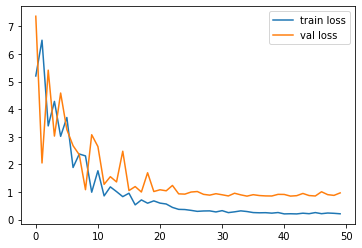

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

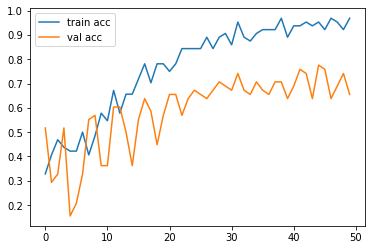

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:
y_pred=model.predict(testing_set)
y_pred

array([[7.50458762e-02, 3.82724971e-01, 5.42229116e-01],
       [8.05778623e-01, 1.25202566e-01, 6.90188110e-02],
       [3.88147868e-02, 6.32285774e-01, 3.28899473e-01],
       [2.44133249e-01, 2.84381270e-01, 4.71485466e-01],
       [4.02760729e-02, 6.70177579e-01, 2.89546371e-01],
       [2.01744400e-02, 4.86945659e-01, 4.92879957e-01],
       [2.26204609e-03, 5.78220189e-01, 4.19517726e-01],
       [1.53087527e-02, 9.23807979e-01, 6.08831830e-02],
       [4.37927054e-04, 9.88411188e-01, 1.11508621e-02],
       [5.27382866e-02, 8.15248024e-03, 9.39109206e-01],
       [1.32493870e-02, 1.26929651e-03, 9.85481322e-01],
       [2.67982129e-02, 2.44782120e-01, 7.28419721e-01],
       [3.14658806e-02, 1.43267348e-01, 8.25266778e-01],
       [4.04133601e-03, 9.86908078e-01, 9.05061699e-03],
       [1.74044713e-01, 1.38182670e-01, 6.87772632e-01],
       [5.57879768e-02, 4.79875738e-03, 9.39413249e-01],
       [1.60381049e-01, 7.89086699e-01, 5.05322218e-02],
       [8.19676593e-02, 4.08952

In [ ]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0,
       2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('Car_data/Test/lamborghini/11.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[3.4781170e-04, 1.0918208e-02, 9.8873401e-01]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a

array([2])